<a href="https://colab.research.google.com/github/iayushkd/ICPHD-IIT-ISM/blob/main/DTC_and_DTS_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Background**

Well logs are interpreted to estimate the petrophysical and geomechanical properties, which is essential for subsurface characterization. Various types of logs exist, and each provides distinct information about subsurface properties. Certain well logs, like gamma ray (GR), resistivity, density, and neutron logs, are considered as  conventional well logs that are run in most of the wells.


# **Problem Statement**

Compressional travel-time (DTC) and shear travel-time (DTS) logs are not acquired in all the wells drilled in a field due to operational constraints. Under such circumstances, machine learning techniques can be used to predict DTC and DTS logs to improve subsurface characterization. The goal is to develop data-driven models by processing  conventional logs from a Well  and use the data-driven models to generate synthetic compressional and shear travel-time logs (DTC and DTS, respectively) in another Well. A robust data-driven model for the desired sonic-log synthesis will result in low prediction errors, which can be quantified in terms of Root Mean Squared Error(RMSE) by comparing the synthesized and the original DTC and DTS logs.
We are provided with  dataset of a Well. We need to build a model using given dataset.The model should use feature sets derived from the following seven logs: Caliper, Neutron, Gamma Ray, Deep Resistivity, Medium Resistivity, Photo-electric factor and density. The  model should synthesize two target logs: DTC and DTS logs.


# **AIM**

To predict the value of DTC and DTS logs from the data of Caliper, Neutron, Gamma Ray, Deep Resistivity, Medium Resistivity, Photo-electric factor and density logs in the test data.

# **GIVEN**

We are given training data which includes the data for all the seven logs and the output for DTC and DTS logs.

# **APPROACH**



1. First we will import all the necesaary libraries and then we will load the training dataset
2. After that we will do some basic data analysIS and gather some basic information about the data.
3. After that we will divide the whole data into X, y_DTC, y_DTS
4. Then we will take X and y_DTC and then we will split then into X_train,X_test,y_train and y_test.
5. After that we will apply different regression models and evaluate the r2 score and rmse for different models.
6. Then those models which will have decent r2 score and rmse, we will apply only those models to predict y_DTS instead applying all models.
7. We will get the best models for both y_DTS and y_DTC.
8. At last we will predict the DTC and DTS for the test data using those models.





# **Importing Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# **Importing Dataset**

In [ ]:
data = pd.read_csv('/content/train.csv')
df = pd.DataFrame(data)
df

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
0,-999.0000,-999.0000,41.4699,-999.0000,-999.0000,-999.0000,-999.0000,128.0737,319.0654
1,-999.0000,-999.0000,42.5053,-999.0000,-999.0000,-999.0000,-999.0000,127.8347,318.7825
2,-999.0000,-999.0000,43.1548,-999.0000,-999.0000,-999.0000,-999.0000,127.2307,317.3323
3,-999.0000,-999.0000,43.2410,-999.0000,-999.0000,-999.0000,-999.0000,126.2917,313.6486
4,-999.0000,-999.0000,40.3218,-999.0000,-999.0000,-999.0000,-999.0000,125.3985,307.8903
...,...,...,...,...,...,...,...,...,...
30138,8.6719,0.1879,119.9486,2.5130,2.5187,0.0597,2.6240,74.2133,131.7747
30139,8.6719,0.1825,122.5286,2.5011,2.4818,0.0582,2.6194,74.3503,132.2201
30140,8.6797,0.1774,122.0544,2.5010,2.4717,0.0571,2.6169,74.4752,132.5171
30141,8.6719,0.1744,120.6518,2.5150,2.5007,0.0562,2.6159,74.5917,132.7115


# **Basic Data Analysis**

In [ ]:
df.isnull().sum() # checking for null values in the data

,0
CAL,0
CNC,0
GR,0
HRD,0
HRM,0
PE,0
ZDEN,0
DTC,0
DTS,0


Conclusion - No null data in the dataset

In [ ]:
df.info() # this will give basic info about the tarining data (train.csv)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30143 entries, 0 to 30142
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CAL     30143 non-null  float64
 1   CNC     30143 non-null  float64
 2   GR      30143 non-null  float64
 3   HRD     30143 non-null  float64
 4   HRM     30143 non-null  float64
 5   PE      30143 non-null  float64
 6   ZDEN    30143 non-null  float64
 7   DTC     30143 non-null  float64
 8   DTS     30143 non-null  float64
dtypes: float64(9)
memory usage: 2.1 MB


**Conclusion**  
* 7 columns of Caliper, Neutron, Gamma Ray, Deep Resistivity, Medium Resistivity, Photo-electric factor and density logs which are independent variable
* 2 columns of DTC and DTS logs which are dependent variable
* 30143 rows
* All columns are of float datatype with no null values




<ipython-input-132-812ad1e19bb7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], kde = False)


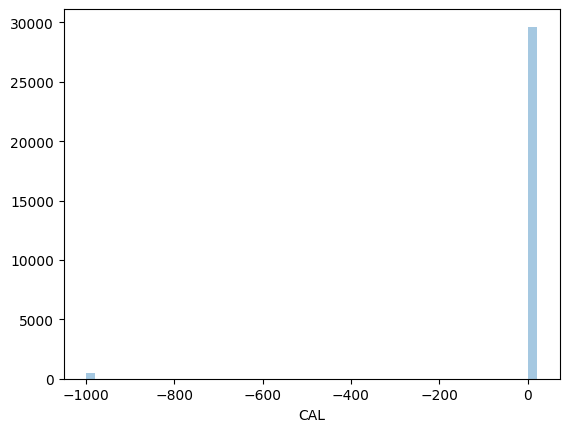

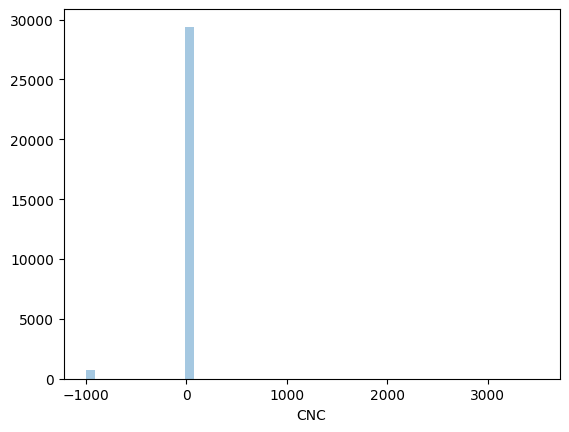

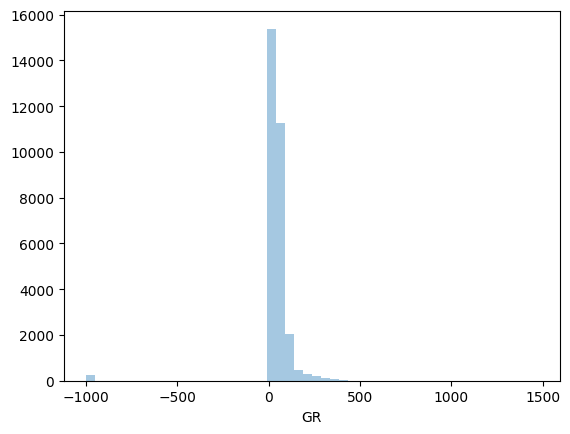

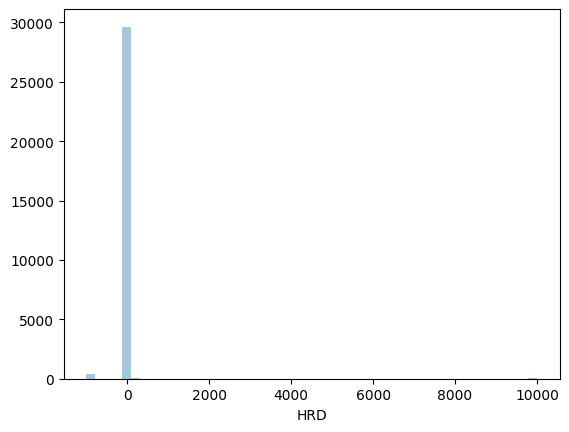

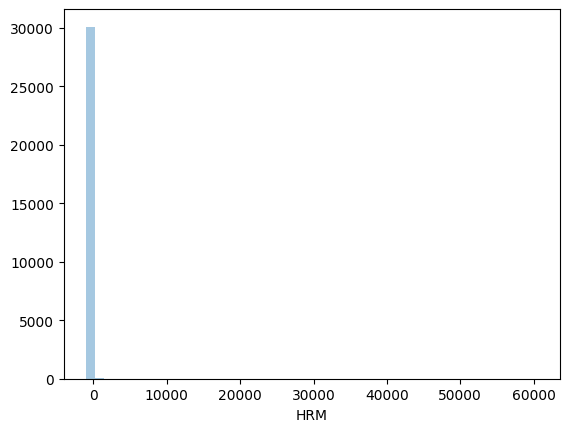

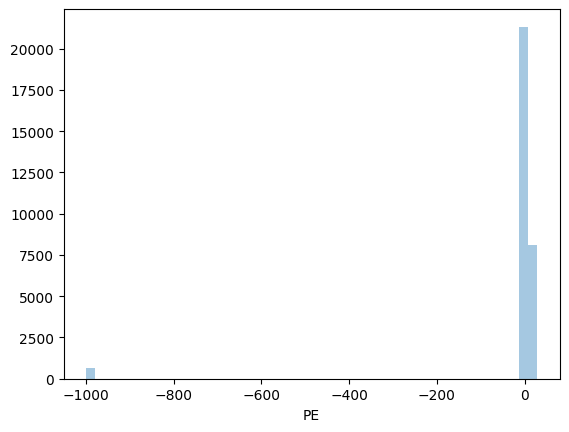

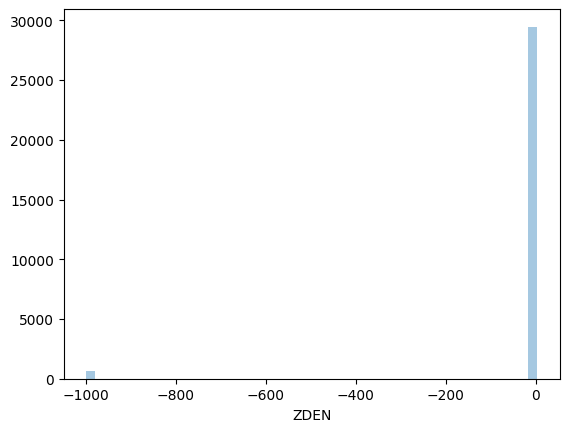

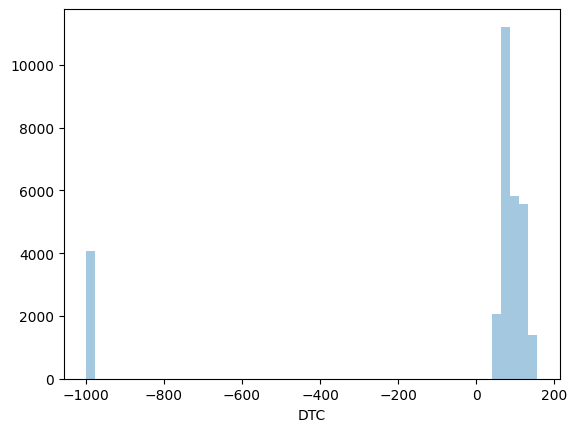

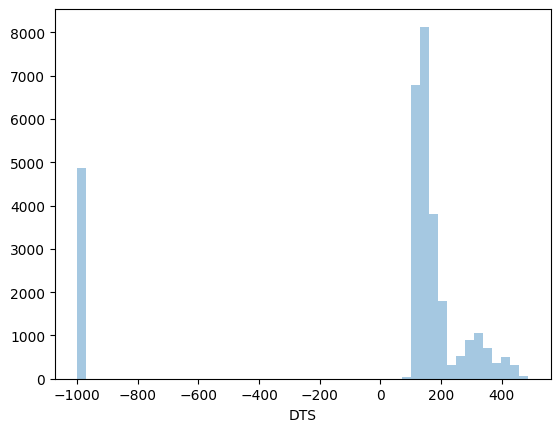

In [ ]:
for i in df.columns:
  sns.distplot(df[i], kde = False)
  plt.show();

 **Conclusions**
- For all the independent variables, some of the data is nearby -1000 and most of the data is nearby 0
- But for both the dependent variables a significant amount of data is near -1000 so we will train the models with feature scaling and without feature scaling to see if feature scaling cretaes any difference in the predictions or not

<Axes: >

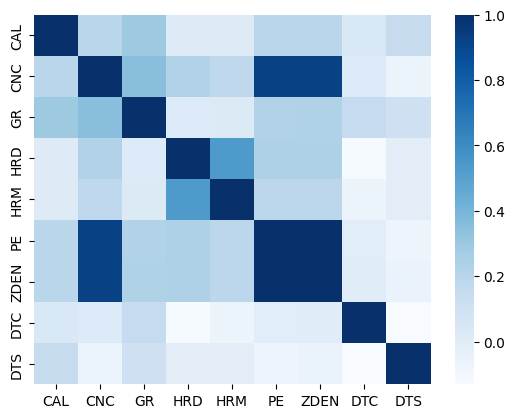

In [ ]:
corr  = df.corr()
sns.heatmap(corr,cmap = 'Blues') # darker the colur better will be the correlation

**Conclusion** - The independent variables does not hold any strong correlation with the dependent variables.

In [ ]:
# Defining dependent and independent variables
X = df.iloc[:,:-2] # independent variables
y_DTC = df.iloc[:,-2] # dependent variables
y_DTS = df.iloc[:,-1]

In [ ]:
X.head()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN
0,-999.0,-999.0,41.4699,-999.0,-999.0,-999.0,-999.0
1,-999.0,-999.0,42.5053,-999.0,-999.0,-999.0,-999.0
2,-999.0,-999.0,43.1548,-999.0,-999.0,-999.0,-999.0
3,-999.0,-999.0,43.2410,-999.0,-999.0,-999.0,-999.0
4,-999.0,-999.0,40.3218,-999.0,-999.0,-999.0,-999.0


In [ ]:
y_DTC.head()

,DTC
0,128.0737
1,127.8347
2,127.2307
3,126.2917
4,125.3985


In [ ]:
y_DTS.head()

,DTS
0,319.0654
1,318.7825
2,317.3323
3,313.6486
4,307.8903


# **Splitting Data(using y_DTC as y)**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_DTC, test_size = 0.2, random_state = 0) # divide X and y_DTC into training and test set
# 80 % is training data and 20 % is test data

# **Feature Scaling**

In [ ]:
X_traincopy = X_train.copy() # creates a copy of X_train to avoid any changes to X_train
X_testcopy = X_test.copy() # creates a copy of X_test
# before fit transform method, it was dataframe
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # this standard scaler object is for X which will be used for X_traincopy and X_testcopy
X_traincopy = sc.fit_transform(X_traincopy)
X_testcopy = sc.transform(X_testcopy)
# after fit transform method it has become numpy array

In [ ]:
X_traincopy

array([[ 0.11826909,  0.15562493, -0.23141154, ...,  0.0093026 ,
         0.17864324,  0.15469104],
       [ 0.13209507,  0.15677178,  0.03708113, ...,  0.00738989,
         0.11961967,  0.15300612],
       [ 0.13268817,  0.15554652,  0.08337051, ...,  0.00721908,
         0.11980188,  0.15472688],
       ...,
       [ 0.13637287,  0.15539925, -0.35474916, ...,  0.01369212,
         0.15721235,  0.15527237],
       [ 0.13829344,  0.15637079,  0.4215074 , ...,  0.00960912,
         0.14441663,  0.15526905],
       [ 0.15772392,  0.15836296,  0.27695851, ...,  0.00593932,
         0.1679321 ,  0.15300214]])

In [ ]:
X_testcopy

array([[ 0.13268817,  0.15572884, -0.32156197, ...,  0.00766502,
         0.11974755,  0.15449793],
       [ 0.11568403,  0.15518123, -0.29732352, ...,  0.01647037,
         0.18105184,  0.15525843],
       [ 0.11560657,  0.15518378, -0.29696825, ...,  0.0210145 ,
         0.18465115,  0.15522194],
       ...,
       [ 0.11536888,  0.15562811, -0.03321228, ...,  0.01176759,
         0.17039239,  0.1549983 ],
       [ 0.13439307,  0.15572884, -0.13425632, ...,  0.00669887,
         0.21084888,  0.15427827],
       [ 0.1308481 ,  0.15526538, -0.10263765, ...,  0.01083959,
         0.14730032,  0.15598509]])

In [ ]:
y_traincopy = y_train.copy()
y_testcopy = y_test.copy()
y_traincopy = np.array(y_traincopy) # converted into numpy array from series
y_testcopy = np.array(y_testcopy)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_y = StandardScaler() # this standard scaler object is for y which will be used for y_traincopy and y_testcopy
y_traincopy = sc_y.fit_transform(y_traincopy.reshape(-1,1)) # converted into 2D array because fit_transform accepts 2D array only
y_testcopy = sc_y.transform(y_testcopy.reshape(-1,1))

# **Multiple Linear Regression(With feature scaling)**

In [ ]:
from sklearn.linear_model import LinearRegression # lib - sklearn, module - linear_model, class - LinearRegression
regressor = LinearRegression() # creating an object of LinearRegression class
regressor.fit(X_traincopy, y_traincopy) # training the model

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score # module - metrics, class - r2_score
y_pred = regressor.predict(X_testcopy) # .predict method will predict the results for X_testcopy
score = r2_score(y_testcopy, y_pred)

In [ ]:
score

0.037658201398376834

**Conclusion** - r2 score of multiple linear regression is very low despite using featurescaling so we will not try to predict y_DTC by multiple linear regression.

# **Polynomial Regression(With Feature scaling)**

In [ ]:
X_traincopy = X_train.copy()
X_testcopy = X_test.copy()
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_traincopy = sc.fit_transform(X_traincopy)
X_testcopy = sc.transform(X_testcopy)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures # module - preprocessing, class - PolynomialFeatures
pf = PolynomialFeatures(degree = 4) # creating object of PolynomialFeatures class with degree 4
X_poly = pf.fit_transform(X_traincopy) # X_poly is the matrix of column of features X and now X_poly will be used to train the model

In [ ]:
y_traincopy = y_train.copy()
y_testcopy = y_test.copy()
y_traincopy = np.array(y_traincopy)
y_testcopy = np.array(y_testcopy)
from sklearn.preprocessing import StandardScaler
sc_y = StandardScaler()
y_traincopy = sc_y.fit_transform(y_traincopy.reshape(-1,1))
y_testcopy = sc_y.transform(y_testcopy.reshape(-1,1))

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_poly, y_traincopy)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score
y_pred = regressor.predict(pf.transform(X_testcopy)) # as we have transformed X_train into matrix of features in the same way we need to transfrom X_test also, but this time we will use transform only not fit_transform
score = r2_score(y_testcopy, y_pred)
score

-59985077795380.95

**Conclusion** -  r2 score of polynomial linear regression is negative despite using featurescaling so we will not try to predict y_DTC by polynomial linear regression.

# **Random Forest(Without Feature Scaling)**

In [ ]:
X_traincopy = X_train.copy()
X_testcopy = X_test.copy()
y_traincopy = y_train.copy()
y_testcopy = y_test.copy()
from sklearn.ensemble import RandomForestRegressor # module - ensemble, class - RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) # n_estimators - number of trees need to build the model
regressor.fit(X_traincopy, y_traincopy) # training the model

RandomForestRegressor(random_state=0)

In [ ]:
regressor.predict(X_testcopy)

array([  71.180795,   60.893218,   60.237991, ...,   75.014697,
         81.470346, -999.      ])

In [ ]:
from sklearn.metrics import r2_score
y_pred = regressor.predict(X_testcopy)
score = r2_score(y_testcopy, y_pred)
score

0.982606485196898

In [ ]:
y_pred

array([  71.180795,   60.893218,   60.237991, ...,   75.014697,
         81.470346, -999.      ])

In [ ]:
y_true = y_testcopy.to_numpy(dtype ='float32')
y_true

array([  70.9935,   60.1487,   61.3411, ...,   74.9905,   88.7463,
       -999.    ], dtype=float32)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
sqrt(mean_squared_error(y_true,y_pred))

48.60040978152058

**Conclusion** - R2 score is near to 1 which shows that it is a good prediction but, we will also apply it with feature scaling and RMSE is also less

# **Random Forest(With Feature Scaling)**

In [ ]:
X_traincopy = X_train.copy()
X_testcopy = X_test.copy()

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_traincopy = sc.fit_transform(X_traincopy)
X_testcopy = sc.transform(X_testcopy)

In [ ]:
y_traincopy = y_train.copy()
y_testcopy = y_test.copy()
y_traincopy = np.array(y_traincopy)
y_testcopy = np.array(y_testcopy)

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc_y = StandardScaler()
y_traincopy = sc_y.fit_transform(y_traincopy.reshape(-1,1))
y_testcopy = sc_y.transform(y_testcopy.reshape(-1,1))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_traincopy, y_traincopy.ravel())# we have used ravel to convert in into 1D array because .fit expects y in 1D form

RandomForestRegressor(random_state=0)

In [ ]:
from sklearn.metrics import r2_score
y_pred = regressor.predict(X_testcopy)
score = r2_score(y_testcopy, y_pred)
score

0.9832445218309241

In [ ]:
y_pred

array([ 0.33969705,  0.31219153,  0.31046279, ...,  0.34954266,
        0.30778966, -2.52231984])

In [ ]:
y_pred1 = sc_y.inverse_transform(y_pred.reshape(-1,1))
y_pred1

array([[  71.179937],
       [  60.894934],
       [  60.248514],
       ...,
       [  74.861459],
       [  59.248963],
       [-999.      ]])

In [ ]:
type(y_testcopy)

numpy.ndarray

In [ ]:
y_true1 = sc_y.inverse_transform(y_testcopy.reshape(-1,1))
y_true1

array([[  70.9935],
       [  60.1487],
       [  61.3411],
       ...,
       [  74.9905],
       [  88.7463],
       [-999.    ]])

In [ ]:
sqrt(mean_squared_error(y_true1,y_pred1))

47.70069084794866

**Conclusion**- There is a slight improvement in the prediction of the model after applying feature scaling.

# **Decision Tree Regression(Without feature scaling)**

In [ ]:
X_traincopy = X_train.copy()
X_testcopy = X_test.copy()
y_traincopy = y_train.copy()
y_testcopy = y_test.copy()

In [ ]:
type(y_testcopy)

pandas.core.series.Series

In [ ]:
from sklearn.tree import DecisionTreeRegressor # module - tree, class - DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 3) # best result with rs 3
regressor.fit(X_traincopy, y_traincopy) # training the model

DecisionTreeRegressor(random_state=3)

In [ ]:
from sklearn.metrics import r2_score
y_pred = regressor.predict(X_testcopy)
score = r2_score(y_testcopy, y_pred)
score

0.9592081189304796

In [ ]:
y_pred

array([  70.8595,   60.7321,   60.7664, ...,   75.3499,  107.1129,
       -999.    ])

In [ ]:
y_true = pd.Series.to_numpy(y_testcopy)
y_true

array([  70.9935,   60.1487,   61.3411, ...,   74.9905,   88.7463,
       -999.    ])

In [ ]:
rmse = sqrt(mean_squared_error(y_true,y_pred))
rmse

74.4274470110482

**Conclusion** - R2 score is near to 0.95 which shows that it is a good prediction but, we will also apply it with feature scaling.

# **Decision Tree Regressor(With Feature Scaling)**

In [ ]:
X_traincopy = X_train.copy()
X_testcopy = X_test.copy()

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_traincopy = sc.fit_transform(X_traincopy)
X_testcopy = sc.transform(X_testcopy)

In [ ]:
y_traincopy = y_train.copy()
y_testcopy = y_test.copy()
y_traincopy = np.array(y_traincopy)
y_testcopy = np.array(y_testcopy)

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc_y = StandardScaler()
y_traincopy = sc_y.fit_transform(y_traincopy.reshape(-1,1))
y_testcopy = sc_y.transform(y_testcopy.reshape(-1,1))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 3) # best result with rs 3
regressor.fit(X_traincopy, y_traincopy)

DecisionTreeRegressor(random_state=3)

In [ ]:
from sklearn.metrics import r2_score
y_pred = regressor.predict(X_testcopy)
score = r2_score(y_testcopy, y_pred)
score

0.9653144644260228

In [ ]:
y_pred = sc_y.inverse_transform(y_pred.reshape(-1,1))
y_pred

array([[  70.8595],
       [  60.7259],
       [  60.7259],
       ...,
       [  74.8882],
       [ 107.1129],
       [-999.    ]])

In [ ]:
y_true = sc_y.inverse_transform(y_testcopy.reshape(-1,1))
y_true

array([[  70.9935],
       [  60.1487],
       [  61.3411],
       ...,
       [  74.9905],
       [  88.7463],
       [-999.    ]])

In [ ]:
rmse = sqrt(mean_squared_error(y_true,y_pred))
rmse

68.63102074980628

**Conclusion** - There is a slight improvement in the prediction of the model after applying feature scaling.

# **Support Vector Regression**

In support vector regression, applying feature scaling is must or in all those models with implicit equation.

In [ ]:
X_traincopy = X_train.copy()
X_testcopy = X_test.copy()

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_traincopy = sc.fit_transform(X_traincopy)
X_testcopy = sc.transform(X_testcopy)

In [ ]:
y_traincopy = y_train.copy()
y_testcopy = y_test.copy()
y_traincopy = np.array(y_traincopy)
y_testcopy = np.array(y_testcopy)

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc_y = StandardScaler()
y_traincopy = sc_y.fit_transform(y_traincopy.reshape(-1,1))
y_testcopy = sc_y.transform(y_testcopy.reshape(-1,1))

In [ ]:
from sklearn.svm import SVR # module - svm, class - SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_traincopy, y_traincopy.ravel())

SVR()

In [ ]:
from sklearn.metrics import r2_score
y_pred = regressor.predict(X_testcopy)
score = r2_score(y_testcopy, y_pred)
score

-0.0016938099090693104

**Conclusion** -  r2 score of SVR is negative despite so we will not try to predict y_DTC by SVR.

As we have seen **Decision Tree** and **Random Forest Regression** had good r2_score so we will compare only them to predict DTS now instead of comparing all the models.

# **Comparing Random Forest and Decision Tree models to predict DTS log values**

In [ ]:
X.head()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN
0,-999.0,-999.0,41.4699,-999.0,-999.0,-999.0,-999.0
1,-999.0,-999.0,42.5053,-999.0,-999.0,-999.0,-999.0
2,-999.0,-999.0,43.1548,-999.0,-999.0,-999.0,-999.0
3,-999.0,-999.0,43.2410,-999.0,-999.0,-999.0,-999.0
4,-999.0,-999.0,40.3218,-999.0,-999.0,-999.0,-999.0


In [ ]:
y_DTS.head()

,DTS
0,319.0654
1,318.7825
2,317.3323
3,313.6486
4,307.8903


# **Splitting the data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_DTS, test_size = 0.2, random_state = 0)

# **Random Forest(Without Feature Scaling)**

In [ ]:
# using random forest model to train the data and to get r2 score for the prediction of DTS values
X_traincopy = X_train.copy()
X_testcopy = X_test.copy()
y_traincopy = y_train.copy()
y_testcopy = y_test.copy()
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_traincopy, y_traincopy)

RandomForestRegressor(random_state=0)

In [ ]:
from sklearn.metrics import r2_score
y_pred = regressor.predict(X_testcopy)
score = r2_score(y_testcopy, y_pred)
score

0.9103459301799156

In [ ]:
y_pred

array([ 133.469135,  115.262025,  113.819919, ...,  144.963181,
       -964.07651 ,  123.83367 ])

In [ ]:
y_true = pd.Series.to_numpy(y_testcopy)
y_true

array([ 134.4209,  112.1758,  114.0536, ...,  139.7914, -999.    ,
        109.3021])

In [ ]:
rmse = sqrt(mean_squared_error(y_true,y_pred))
rmse

133.31427275912432

**Conclusion** - R2 score is near to 0.90 which shows that it is a good prediction but we will also apply it with feature scaling.

# **Random Forest(With Feature Scaling)**

In [ ]:
X_traincopy = X_train.copy()
X_testcopy = X_test.copy()

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_traincopy = sc.fit_transform(X_traincopy)
X_testcopy = sc.transform(X_testcopy)

In [ ]:
y_traincopy = y_train.copy()
y_testcopy = y_test.copy()
y_traincopy = np.array(y_traincopy)
y_testcopy = np.array(y_testcopy)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_y = StandardScaler()
y_traincopy = sc_y.fit_transform(y_traincopy.reshape(-1,1))
y_testcopy = sc_y.transform(y_testcopy.reshape(-1,1))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_traincopy, y_traincopy.ravel())

RandomForestRegressor(random_state=0)

In [ ]:
from sklearn.metrics import r2_score
y_pred = regressor.predict(X_testcopy)
score = r2_score(y_testcopy, y_pred)
score

0.9104677488084334

In [ ]:
y_true = sc_y.inverse_transform(y_testcopy.reshape(-1,1))
y_true

array([[ 134.4209],
       [ 112.1758],
       [ 114.0536],
       ...,
       [ 139.7914],
       [-999.    ],
       [ 109.3021]])

In [ ]:
y_pred1 = sc_y.inverse_transform(y_pred.reshape(-1,1))
y_pred1

array([[ 133.431101],
       [ 115.270482],
       [ 113.872131],
       ...,
       [ 144.642308],
       [-952.091268],
       [ 123.783759]])

In [ ]:
rmse = sqrt(mean_squared_error(y_true,y_pred1))
rmse

133.22367072462873

**Conclusion** - There is a slight improvement in r2_score after feature scaling

# **Decision Tree(Without Feature Scaling)**

In [ ]:
X_traincopy = X_train.copy()
X_testcopy = X_test.copy()
y_traincopy = y_train.copy()
y_testcopy = y_test.copy()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 3) # best result with rs 3
regressor.fit(X_traincopy, y_traincopy)

DecisionTreeRegressor(random_state=3)

In [ ]:
from sklearn.metrics import r2_score
y_pred = regressor.predict(X_testcopy)
score = r2_score(y_testcopy, y_pred)
score

0.8320102690484622

In [ ]:
y_pred

array([ 132.5967,  114.0711,  111.8488, ...,  140.5729, -999.    ,
        118.1656])

In [ ]:
y_testcopy

,DTS
21975,134.4209
14751,112.1758
14644,114.0536
2917,374.7678
29375,126.8886
...,...
12789,142.7880
22979,119.7048
16357,139.7914
7811,-999.0000


In [ ]:
rmse = sqrt(mean_squared_error(y_testcopy,y_pred))
rmse

182.4874533960032

**Conclusion** - Even if we apply feature scaling, there will be a slight change in the score as we have seen in DTC case, so we will not comapre this by applying feature scaling.

**So finally we will use Random forest regression to predict values of both DTS and DTC logs that also without feature scaling because with fature scaling also the r2_score is not getting effected that much but we have to do fit_transform and then inverse_transform to get the result which will be time consuming.**

# **Using Random Forest Regression(Without Feature Scaling) to predict the value of DTC log**


In [ ]:
# training the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_DTC, test_size = 0.2, random_state = 0)
X_traincopy = X_train.copy() # X_train is the 80% data of X use to train the model
X_testcopy = X_test.copy() # X_test is the 20% data of the X, which values will be predicted and compared with y_test
y_traincopy = y_train.copy()
y_testcopy = y_test.copy()
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_traincopy, y_traincopy)
from sklearn.metrics import r2_score
y_pred = regressor.predict(X_testcopy)
score = r2_score(y_testcopy, y_pred)
score

0.982606485196898

In [ ]:
# creating a dataframe to compare the actual values and the predicted values
compare = pd.DataFrame({'Actual':y_testcopy, 'Predicted':y_pred})
compare.reset_index(drop = True,inplace = True)
compare

,Actual,Predicted
0,70.9935,71.180795
1,60.1487,60.893218
2,61.3411,60.237991
3,132.6602,133.423457
4,72.9889,74.269801
...,...,...
6024,-999.0000,-999.000000
6025,64.1290,64.998854
6026,74.9905,75.014697
6027,88.7463,81.470346


In [ ]:
# adding a diffeence column in the dataframe visualize the accuracy of the prediction
compare['Difference'] = compare['Actual'] - compare['Predicted']
compare

,Actual,Predicted,Difference
0,70.9935,71.180795,-0.187295
1,60.1487,60.893218,-0.744518
2,61.3411,60.237991,1.103109
3,132.6602,133.423457,-0.763257
4,72.9889,74.269801,-1.280901
...,...,...,...
6024,-999.0000,-999.000000,0.000000
6025,64.1290,64.998854,-0.869854
6026,74.9905,75.014697,-0.024197
6027,88.7463,81.470346,7.275954


In [ ]:
# this will give the absolute value of the difference or the deviation from actual result
compare['Absolute Difference'] = compare['Difference'].abs()

In [ ]:
compare

,Actual,Predicted,Difference,Absolute Difference
0,70.9935,71.180795,-0.187295,0.187295
1,60.1487,60.893218,-0.744518,0.744518
2,61.3411,60.237991,1.103109,1.103109
3,132.6602,133.423457,-0.763257,0.763257
4,72.9889,74.269801,-1.280901,1.280901
...,...,...,...,...
6024,-999.0000,-999.000000,0.000000,0.000000
6025,64.1290,64.998854,-0.869854,0.869854
6026,74.9905,75.014697,-0.024197,0.024197
6027,88.7463,81.470346,7.275954,7.275954


In [ ]:
compare.shape # 6029 rows in the X_test

(6029, 4)

In [ ]:
compare['Absolute Difference'].max() # max deviation from original data is 977.57

977.572402

In [ ]:
compare['Absolute Difference'].min() # min deviation is 0 from actual data

0.0

In [ ]:
compare['Absolute Difference'].mean() # average deviation is 7.74

7.741218401061535

In [ ]:
compare[compare['Absolute Difference']>compare['Absolute Difference'].mean()].shape

(538, 4)

**Conclusion** - From 6029 datapoints, only 538 datapoints are deviated above average from the actual value of DTC in the y_test.

# **Loading test data to predict the values of DTS and DTC logs**

In [ ]:
data_to_predict = pd.read_csv('/content/test.csv')
df1 = pd.DataFrame(data_to_predict)
df1.head()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN
0,8.5781,0.3521,55.1824,0.8121,0.7810,6.8291,2.3256
1,8.5781,0.3639,57.0114,0.8038,0.7723,6.8100,2.3255
2,8.5781,0.3703,58.9263,0.7444,0.7048,6.7766,2.3212
3,8.5625,0.3667,57.3308,0.7169,0.6542,6.7219,2.3119
4,8.5781,0.3500,53.0624,0.6845,0.6109,6.6384,2.2982


**As we can see that the test data does not contain the values of DTS and DTC, we need to predict them with our trained Random Forest Regression**

In [ ]:
df1['Predicted_DTC'] = regressor.predict(data_to_predict) # prediction of data done

In [ ]:
df1

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,Predicted_DTC
0,8.5781,0.3521,55.1824,0.8121,0.7810,6.8291,2.3256,107.366941
1,8.5781,0.3639,57.0114,0.8038,0.7723,6.8100,2.3255,109.043461
2,8.5781,0.3703,58.9263,0.7444,0.7048,6.7766,2.3212,115.350013
3,8.5625,0.3667,57.3308,0.7169,0.6542,6.7219,2.3119,113.385537
4,8.5781,0.3500,53.0624,0.6845,0.6109,6.6384,2.2982,108.228329
...,...,...,...,...,...,...,...,...
11083,8.7813,0.1882,68.0333,1.0280,0.9815,6.5003,2.4423,-525.085768
11084,8.7344,0.1879,68.0753,1.0249,0.9822,6.4415,2.4377,-525.508207
11085,8.7266,0.1824,68.8516,1.0459,1.0199,6.3413,2.4342,-350.696924
11086,8.7500,0.1822,70.8515,1.0609,1.0541,6.2254,2.4320,-317.448560


**As we can see in the above dataframe we have the predicted values for DTC log.**

# **Using Random Forest Regression(Without Feature Scaling) to predict the value of DTS log**


In [ ]:
# training the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_DTS, test_size = 0.2, random_state = 0)
X_traincopy = X_train.copy()
X_testcopy = X_test.copy()
y_traincopy = y_train.copy()
y_testcopy = y_test.copy()
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_traincopy, y_traincopy)
from sklearn.metrics import r2_score
y_pred = regressor.predict(X_testcopy)
score = r2_score(y_testcopy, y_pred)
score

0.9103459301799156

In [ ]:
# creating a dataframe to compare the actual values and the predicted values
compare = pd.DataFrame({'Actual':y_testcopy, 'Predicted':y_pred})
compare.reset_index(drop = True,inplace = True)
compare

,Actual,Predicted
0,134.4209,133.469135
1,112.1758,115.262025
2,114.0536,113.819919
3,374.7678,377.612653
4,126.8886,127.639672
...,...,...
6024,142.7880,141.317240
6025,119.7048,119.892412
6026,139.7914,144.963181
6027,-999.0000,-964.076510


In [ ]:
# adding a diffeence column in the dataframe visualize the accuracy of the prediction
compare['Difference'] = compare['Actual'] - compare['Predicted']
compare

,Actual,Predicted,Difference
0,134.4209,133.469135,0.951765
1,112.1758,115.262025,-3.086225
2,114.0536,113.819919,0.233681
3,374.7678,377.612653,-2.844853
4,126.8886,127.639672,-0.751072
...,...,...,...
6024,142.7880,141.317240,1.470760
6025,119.7048,119.892412,-0.187612
6026,139.7914,144.963181,-5.171781
6027,-999.0000,-964.076510,-34.923490


In [ ]:
compare['Absolute Difference'] = compare['Difference'].abs()
compare

,Actual,Predicted,Difference,Absolute Difference
0,134.4209,133.469135,0.951765,0.951765
1,112.1758,115.262025,-3.086225,3.086225
2,114.0536,113.819919,0.233681,0.233681
3,374.7678,377.612653,-2.844853,2.844853
4,126.8886,127.639672,-0.751072,0.751072
...,...,...,...,...
6024,142.7880,141.317240,1.470760,1.470760
6025,119.7048,119.892412,-0.187612,0.187612
6026,139.7914,144.963181,-5.171781,5.171781
6027,-999.0000,-964.076510,-34.923490,34.923490


In [ ]:
compare.shape # 6029 rows in the data

(6029, 4)

In [ ]:
compare['Absolute Difference'].max() # max deviation is 1401 from the original data

1401.7411089999998

In [ ]:
compare['Absolute Difference'].min() # min deviation is 0

0.0

In [ ]:
compare['Absolute Difference'].mean() # average deviation is 31.35 from the actual data

31.354602788190412

In [ ]:
# 605 datapoints from 6209 datapoints deviate more than the mean value
compare[compare['Absolute Difference']>compare['Absolute Difference'].mean()].shape

(605, 4)

In [ ]:
df1['Predicted_DTS'] = regressor.predict(data_to_predict) # DTS value predicted

In [ ]:
df1

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,Predicted_DTC,Predicted_DTS
0,8.5781,0.3521,55.1824,0.8121,0.7810,6.8291,2.3256,107.366941,-999.000000
1,8.5781,0.3639,57.0114,0.8038,0.7723,6.8100,2.3255,109.043461,-999.000000
2,8.5781,0.3703,58.9263,0.7444,0.7048,6.7766,2.3212,115.350013,-999.000000
3,8.5625,0.3667,57.3308,0.7169,0.6542,6.7219,2.3119,113.385537,-999.000000
4,8.5781,0.3500,53.0624,0.6845,0.6109,6.6384,2.2982,108.228329,-986.546197
...,...,...,...,...,...,...,...,...,...
11083,8.7813,0.1882,68.0333,1.0280,0.9815,6.5003,2.4423,-525.085768,-607.305878
11084,8.7344,0.1879,68.0753,1.0249,0.9822,6.4415,2.4377,-525.508207,-607.305878
11085,8.7266,0.1824,68.8516,1.0459,1.0199,6.3413,2.4342,-350.696924,-551.344184
11086,8.7500,0.1822,70.8515,1.0609,1.0541,6.2254,2.4320,-317.448560,40.443918


# **Above dataframe is our final dataframe which includes the predicted values of DTS and DTC logs from the given values of 7 other logs in the test data.**